https://www.kaggle.com/code/adtysregita/pca-application-using-cifar10-dataset


In [ ]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from tensorflow.keras.optimizers import RMSprop
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

import visualkeras

# Data Prep

In [ ]:
data = keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = data.load_data()

#print the shape of training, testing, and label data
print('Training Data Shape: ', x_train.shape)
print('Testing Data Shape: ', x_test.shape)

print('Label Training Data Shape: ', y_train.shape)
print('Label Testing Data Shape: ', y_test.shape)

Training Data Shape:  (50000, 32, 32, 3)
Testing Data Shape:  (10000, 32, 32, 3)
Label Training Data Shape:  (50000, 1)
Label Testing Data Shape:  (10000, 1)


In [ ]:
#find out total number of labels and classes
classes = np.unique(y_train)
nClasses = len(classes)
print('Number of Outputs: ', nClasses)
print('Number of Output Classes: ', classes)

Number of Outputs:  10
Number of Output Classes:  [0 1 2 3 4 5 6 7 8 9]


In [ ]:
#plot images from dataset
%matplotlib inline

label_list = {
    0: 'Airplane',
    1: 'Automobile',
    2: 'Bird',
    3: 'Cat',
    4: 'Deer',
    5: 'Dog',
    6: 'Frog',
    7: 'Horse',
    8: 'Ship',
    9: 'Truck',
}

Text(0.5, 1.0, '(Label: Frog)')
Text(0.5, 1.0, '(Label: Cat)')


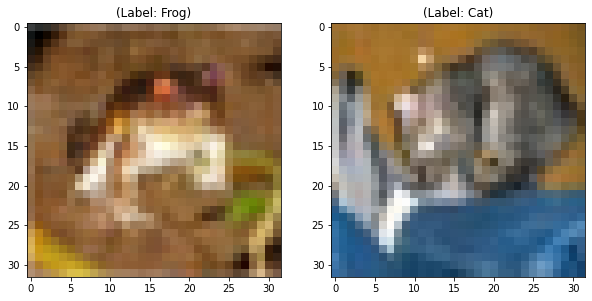

In [ ]:
#display 1st image in training data
plt.figure(figsize = [10,10])
plt.subplot(121)
curr_img = np.reshape(x_train[0], (32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_list[y_train[0][0]]) + ")"))

#display 1st image in testing data
plt.subplot(122)
curr_img = np.reshape(x_test[0], (32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_list[y_test[0][0]]) + ")"))

In [ ]:
#check max and min values of dataset
np.min(x_train), np.max(x_train)

(0, 255)

In [ ]:
x_train = np.array(x_train)
x_test = np.array(x_test)

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_train_ = x_train.reshape(-1,3072)
feat_cols = ['pixel' + str(i) for i in range(x_train_.shape[1])]
df_cifar1 = pd.DataFrame(x_train_, columns = feat_cols)
df_cifar1['Label'] = y_train
df_cifar1

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel3063,pixel3064,pixel3065,pixel3066,pixel3067,pixel3068,pixel3069,pixel3070,pixel3071,Label
0,59,62,63,43,46,45,50,48,43,68,...,216,184,140,151,118,84,123,92,72,6
1,154,177,187,126,137,136,105,104,95,102,...,143,133,139,143,134,142,143,133,144,9
2,255,255,255,253,253,253,253,253,253,253,...,78,85,83,79,85,83,80,86,84,9
3,28,25,10,37,34,19,38,35,20,42,...,54,47,28,63,56,37,72,65,46,4
4,170,180,198,168,178,196,177,185,203,183,...,75,79,82,71,75,78,73,77,80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,145,161,194,151,166,199,156,171,205,155,...,39,41,56,36,38,53,37,39,54,2
49996,255,245,132,254,247,134,255,249,137,254,...,249,174,79,252,181,81,253,181,76,6
49997,35,178,235,40,176,239,42,176,241,39,...,27,52,77,21,43,66,12,31,50,9
49998,189,211,240,186,208,236,185,207,235,184,...,195,184,169,196,189,171,195,190,171,1


In [ ]:
#df_cifar1.to_csv("/content/drive/MyDrive/Lampiran Skripsi/Output Skripsi/cifarpixel.csv", index=False)

In [ ]:
#normalize pixels between 0 and 1
x_train = x_train/255.0
np.min(x_train), np.max(x_train)
x_train.shape

(50000, 32, 32, 3)

In [ ]:
#flatten images
x_train_flat = x_train.reshape(-1,3072)
feat_cols = ['pixel' + str(i) for i in range(x_train_flat.shape[1])]
df_cifar = pd.DataFrame(x_train_flat, columns = feat_cols)
df_cifar['Label'] = y_train
print('Size of Data Frame: {}'.format(df_cifar.shape))

Size of Data Frame: (50000, 3073)


In [ ]:
df_cifar

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel3063,pixel3064,pixel3065,pixel3066,pixel3067,pixel3068,pixel3069,pixel3070,pixel3071,Label
0,0.231373,0.243137,0.247059,0.168627,0.180392,0.176471,0.196078,0.188235,0.168627,0.266667,...,0.847059,0.721569,0.549020,0.592157,0.462745,0.329412,0.482353,0.360784,0.282353,6
1,0.603922,0.694118,0.733333,0.494118,0.537255,0.533333,0.411765,0.407843,0.372549,0.400000,...,0.560784,0.521569,0.545098,0.560784,0.525490,0.556863,0.560784,0.521569,0.564706,9
2,1.000000,1.000000,1.000000,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,...,0.305882,0.333333,0.325490,0.309804,0.333333,0.325490,0.313725,0.337255,0.329412,9
3,0.109804,0.098039,0.039216,0.145098,0.133333,0.074510,0.149020,0.137255,0.078431,0.164706,...,0.211765,0.184314,0.109804,0.247059,0.219608,0.145098,0.282353,0.254902,0.180392,4
4,0.666667,0.705882,0.776471,0.658824,0.698039,0.768627,0.694118,0.725490,0.796078,0.717647,...,0.294118,0.309804,0.321569,0.278431,0.294118,0.305882,0.286275,0.301961,0.313725,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.568627,0.631373,0.760784,0.592157,0.650980,0.780392,0.611765,0.670588,0.803922,0.607843,...,0.152941,0.160784,0.219608,0.141176,0.149020,0.207843,0.145098,0.152941,0.211765,2
49996,1.000000,0.960784,0.517647,0.996078,0.968627,0.525490,1.000000,0.976471,0.537255,0.996078,...,0.976471,0.682353,0.309804,0.988235,0.709804,0.317647,0.992157,0.709804,0.298039,6
49997,0.137255,0.698039,0.921569,0.156863,0.690196,0.937255,0.164706,0.690196,0.945098,0.152941,...,0.105882,0.203922,0.301961,0.082353,0.168627,0.258824,0.047059,0.121569,0.196078,9
49998,0.741176,0.827451,0.941176,0.729412,0.815686,0.925490,0.725490,0.811765,0.921569,0.721569,...,0.764706,0.721569,0.662745,0.768627,0.741176,0.670588,0.764706,0.745098,0.670588,1


In [ ]:
#df_cifar.to_csv("/content/drive/MyDrive/Lampiran Skripsi/Output Skripsi/cifarpixerlnorm.csv", index=False)

# PCA Information

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from keras.datasets import cifar10

# Menggabungkan data latih dan data uji
all_images = np.concatenate((x_train, x_test))

# Melakukan PCA pada data
pca = PCA(svd_solver='full')
pca.fit(all_images.reshape(all_images.shape[0], -1))

# Menampilkan eigenvalue dan eigenvector hanya pada fitur dengan varians tidak 0
non_zero_indices = np.where(pca.explained_variance_ratio_ != 0)[0]
eigenvalues = pca.explained_variance_ratio_[non_zero_indices]
eigenvectors = pca.components_[:, non_zero_indices]
print("Eigenvalues: \n", eigenvalues)
print("Eigenvectors: \n", eigenvectors)


Eigenvalues: 
 [8.17366731e-01 3.09269567e-02 1.95230204e-02 ... 1.22450942e-09
 1.21237658e-09 1.15857114e-09]
Eigenvectors: 
 [[ 0.01977682  0.02060397  0.02039506 ...  0.0186733   0.01865632
   0.01738057]
 [-0.02522653 -0.02731218 -0.03200311 ...  0.01132005  0.00971454
   0.00703696]
 [ 0.01515653  0.0130415   0.01068531 ...  0.02965539  0.02806892
   0.02680322]
 ...
 [-0.00455513  0.00581799 -0.000569   ... -0.00466357  0.00460954
   0.00037495]
 [-0.00797484  0.00994817 -0.00127524 ...  0.00883179 -0.01189261
   0.00302042]
 [ 0.00085839  0.00092107 -0.0011867  ...  0.00467321 -0.00294681
  -0.00142168]]


In [ ]:
"""np.set_printoptions(threshold=np.inf)

with open('eigenvector.txt', 'w') as file:
   print("Eigenvectors: \n", eigenvectors, file=file)"""

'np.set_printoptions(threshold=np.inf)\n\nwith open(\'eigenvector.txt\', \'w\') as file:\n   print("Eigenvectors: \n", eigenvectors, file=file)'

In [ ]:
"""np.set_printoptions(threshold=np.inf)

with open('filename.txt', 'w') as file:
   print("Eigenvalues: \n", eigenvalues,file=file)"""

'np.set_printoptions(threshold=np.inf)\n\nwith open(\'filename.txt\', \'w\') as file:\n   print("Eigenvalues: \n", eigenvalues,file=file)'

In [ ]:
#create PCA method
pca_cifar = PCA(n_components = 3)
principalComponents_cifar = pca_cifar.fit_transform(df_cifar.iloc[:, :-1])

In [ ]:
#variance of principal components
print('Explained Variation per Principal Component: {}'.format(pca_cifar.explained_variance_ratio_))

Explained Variation per Principal Component: [0.2907663  0.11253144 0.06694414]


In [ ]:
#convert principal components
principal_cifar_Df = pd.DataFrame(data = principalComponents_cifar,
                                  columns = ['Principal Component 1', 'Principal Component 2', 'Principal Component 3'])
principal_cifar_Df['Label'] = y_train
principal_cifar_Df

,Principal Component 1,Principal Component 2,Principal Component 3,Label
0,-6.401018,2.729039,1.501710,6
1,0.829783,-0.949943,6.003753,9
2,7.730200,-11.522102,-2.753619,9
3,-10.347817,0.010738,1.101019,4
4,-2.625651,-4.969240,1.034583,1
...,...,...,...,...
49995,7.106037,-5.851024,9.370927,2
49996,6.216884,1.898764,-7.042045,6
49997,0.707347,-11.342521,-0.393920,9
49998,11.367909,-3.375978,5.566196,1


<Axes: xlabel='Principal Component 1', ylabel='Principal Component 2'>

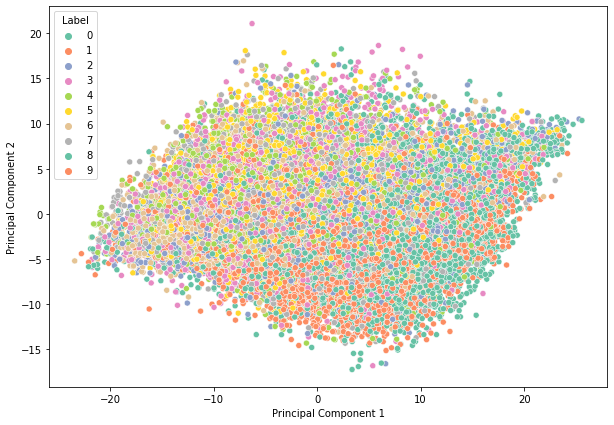

In [ ]:
#plotting dataset into 2d graph
plt.figure(figsize = (10,7))
sns.scatterplot(
    x = "Principal Component 1", y = "Principal Component 2",
    hue = "Label",
    palette = sns.color_palette("Set2", 10),
    data = principal_cifar_Df,
    legend = "full",
    alpha = 1.0
)

#CNN

In [ ]:
#speed up testing process with PCA
#reshape dataset and determine number of variance
x_test = x_test/255.0
x_test = x_test.reshape(-1, 32, 32, 3)
x_test_flat = x_test.reshape(-1, 3072)


In [ ]:
pca = PCA(0.8)
pca.fit(x_train_flat)

PCA(copy = True, iterated_power = 'auto', n_components = 0.8, random_state = None, svd_solver = 'auto', tol = 0.0, whiten = False)


PCA(n_components=0.8)

In [ ]:
print("Eigen Vector: \n",pca.components_)
print("Eigen Value: \n",pca.explained_variance_)
print("Variance Proportion: \n",pca.explained_variance_ratio_)

Eigen Vector: 
 [[ 0.02634975  0.02778743  0.03111119 ...  0.01573704  0.01672143
   0.01920378]
 [-0.01584631 -0.01756834 -0.02031506 ...  0.02254787  0.02146667
   0.02053795]
 [-0.02171791 -0.01858465 -0.01290838 ... -0.02581563 -0.02255578
  -0.01697871]
 ...
 [-0.02265579 -0.02207662 -0.02104289 ... -0.01431943 -0.01535273
  -0.01747479]
 [-0.02281368 -0.0232702  -0.02311942 ...  0.00340318  0.0028466
   0.00162045]
 [ 0.02388599  0.02434611  0.02505934 ... -0.02785077 -0.02814279
  -0.0281594 ]]
Eigen Value: 
 [55.36332259 21.42653484 12.74649095  7.00015712  6.87141308  5.34891071
  5.16566928  4.12638318  3.93117801  2.73802504  2.49537545  2.02967495
  1.99921552  1.91217628  1.74883506  1.55636978  1.40824955  1.36354622
  1.30897951  1.22476696  1.13175968  1.11835205  0.94358458  0.93449204
  0.91480413  0.88705297  0.85938862  0.84473898  0.76310625  0.74994029
  0.69729599  0.6343139   0.61684553]
Variance Proportion: 
 [0.2907663  0.11253144 0.06694414 0.03676459 0.03608

In [ ]:
train_img_pca = pca.transform(x_train_flat)
test_img_pca = pca.transform(x_test_flat)

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [ ]:
#define batch size, number of classes, and epoch
batch_size = 128
num_classes = 10
epochs = 50

In [ ]:
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from tensorflow.keras.optimizers import RMSprop
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

In [ ]:
#define Sequential model
model = Sequential()
model.add(Dense(1024, activation = 'relu', input_shape = (99,)))
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(num_classes, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              102400    
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_2 (Dense)             (None, 512)               524800    
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dense_4 (Dense)             (None, 10)                2570      
                                                                 
Total params: 1,810,698
Trainable params: 1,810,698
Non-trainable params: 0
_________________________________________________________________


In [ ]:

model1 = Sequential()
model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model1.add(MaxPooling2D((2, 2)))
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Conv2D(128, (3, 3), activation='relu'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Flatten())
model1.add(Dense(1024, activation = 'relu'))
model1.add(Dense(512, activation = 'relu'))
model1.add(Dense(256, activation = 'relu'))
model1.add(Dense(num_classes, activation = 'softmax'))


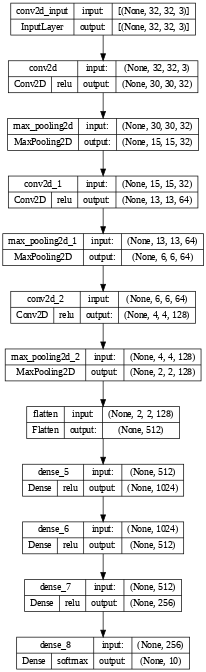

In [ ]:
tf.keras.utils.plot_model(
model1,
to_file="model.png",
show_shapes=True,
show_dtype=False,
show_layer_names=True,
rankdir="TB",
expand_nested=True,
dpi=50,
layer_range=None,
show_layer_activations=True,
)

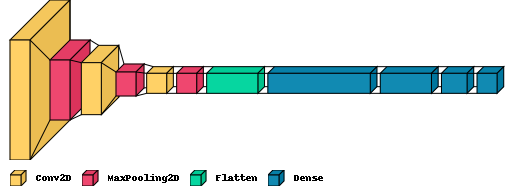

In [ ]:
from PIL import ImageFont

visualkeras.layered_view(model1, legend=True)  # font is optional!

In [ ]:
#compile and train the model
model.compile(loss = 'categorical_crossentropy',
              optimizer = RMSprop(),
              metrics = ['accuracy'])

history = model.fit(train_img_pca,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (test_img_pca, y_test))

Epoch 1/50
391/391 [==============================] - 5s 5ms/step - loss: 1.6368 - accuracy: 0.4210 - val_loss: 1.5166 - val_accuracy: 0.4525
Epoch 2/50
391/391 [==============================] - 2s 4ms/step - loss: 1.3174 - accuracy: 0.5322 - val_loss: 1.3282 - val_accuracy: 0.5280
Epoch 3/50
391/391 [==============================] - 2s 4ms/step - loss: 1.1390 - accuracy: 0.5929 - val_loss: 1.2837 - val_accuracy: 0.5455
Epoch 4/50
391/391 [==============================] - 2s 4ms/step - loss: 0.9829 - accuracy: 0.6478 - val_loss: 1.3315 - val_accuracy: 0.5472
Epoch 5/50
391/391 [==============================] - 2s 4ms/step - loss: 0.8294 - accuracy: 0.7031 - val_loss: 1.3909 - val_accuracy: 0.5592
Epoch 6/50
391/391 [==============================] - 2s 4ms/step - loss: 0.6923 - accuracy: 0.7511 - val_loss: 1.5059 - val_accuracy: 0.5531
Epoch 7/50
391/391 [==============================] - 2s 4ms/step - loss: 0.5652 - accuracy: 0.7980 - val_loss: 1.6671 - val_accuracy: 0.5635
Epoch 

In [ ]:
#compile and train full dataset
model = Sequential()
model.add(Dense(1024, activation = 'relu', input_shape = (3072,)))
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(num_classes, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy',
              optimizer = RMSprop(learning_rate=0.0001, decay=1e-6),
              metrics = ['accuracy'])

history = model.fit(x_train_flat,
                    y_train,batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (x_test_flat, y_test))

Epoch 1/50
391/391 [==============================] - 3s 7ms/step - loss: 1.8943 - accuracy: 0.3153 - val_loss: 1.8454 - val_accuracy: 0.3481
Epoch 2/50
391/391 [==============================] - 2s 6ms/step - loss: 1.6877 - accuracy: 0.3992 - val_loss: 1.6156 - val_accuracy: 0.4221
Epoch 3/50
391/391 [==============================] - 2s 6ms/step - loss: 1.5960 - accuracy: 0.4314 - val_loss: 1.5464 - val_accuracy: 0.4468
Epoch 4/50
391/391 [==============================] - 2s 6ms/step - loss: 1.5280 - accuracy: 0.4582 - val_loss: 1.5724 - val_accuracy: 0.4433
Epoch 5/50
391/391 [==============================] - 2s 6ms/step - loss: 1.4712 - accuracy: 0.4780 - val_loss: 1.6342 - val_accuracy: 0.4235
Epoch 6/50
391/391 [==============================] - 2s 6ms/step - loss: 1.4176 - accuracy: 0.4957 - val_loss: 1.4176 - val_accuracy: 0.4977
Epoch 7/50
391/391 [==============================] - 2s 6ms/step - loss: 1.3758 - accuracy: 0.5141 - val_loss: 1.5486 - val_accuracy: 0.4468
Epoch 

In [ ]:
#compile and train full dataset
model1 = Sequential()
model1.add(Dense(1024, activation = 'relu', input_shape = (3072,)))
model1.add(Dense(1024, activation = 'relu'))
model1.add(Dense(512, activation = 'relu'))
model1.add(Dense(256, activation = 'relu'))
model1.add(Dense(num_classes, activation = 'softmax'))
model1.compile(loss = 'categorical_crossentropy',
              optimizer = RMSprop(learning_rate=0.0001, decay=1e-6),
              metrics = ['accuracy'])

history100 = model1.fit(x_train_flat,
                    y_train,batch_size = batch_size,
                    epochs = 100,
                    verbose = 1,
                    validation_data = (x_test_flat, y_test))

Epoch 1/100
391/391 [==============================] - 5s 7ms/step - loss: 1.8880 - accuracy: 0.3192 - val_loss: 1.8056 - val_accuracy: 0.3626
Epoch 2/100
391/391 [==============================] - 3s 8ms/step - loss: 1.6818 - accuracy: 0.3987 - val_loss: 1.7457 - val_accuracy: 0.3711
Epoch 3/100
391/391 [==============================] - 3s 7ms/step - loss: 1.5929 - accuracy: 0.4362 - val_loss: 1.6348 - val_accuracy: 0.4087
Epoch 4/100
391/391 [==============================] - 2s 6ms/step - loss: 1.5245 - accuracy: 0.4582 - val_loss: 1.5445 - val_accuracy: 0.4469
Epoch 5/100
391/391 [==============================] - 2s 6ms/step - loss: 1.4684 - accuracy: 0.4783 - val_loss: 1.5634 - val_accuracy: 0.4417
Epoch 6/100
391/391 [==============================] - 2s 6ms/step - loss: 1.4206 - accuracy: 0.4967 - val_loss: 1.4509 - val_accuracy: 0.4794
Epoch 7/100
391/391 [==============================] - 3s 6ms/step - loss: 1.3719 - accuracy: 0.5126 - val_loss: 1.4473 - val_accuracy: 0.4729

In [ ]:
#compile and train full dataset
model15 = Sequential()
model15.add(Dense(1024, activation = 'relu', input_shape = (3072,)))
model15.add(Dense(1024, activation = 'relu'))
model15.add(Dense(512, activation = 'relu'))
model15.add(Dense(256, activation = 'relu'))
model15.add(Dense(num_classes, activation = 'softmax'))
model15.compile(loss = 'categorical_crossentropy',
              optimizer = RMSprop(learning_rate=0.0001, decay=1e-6),
              metrics = ['accuracy'])

history150 = model15.fit(x_train_flat,
                    y_train,batch_size = batch_size,
                    epochs = 150,
                    verbose = 1,
                    validation_data = (x_test_flat, y_test))

Epoch 1/150
391/391 [==============================] - 3s 7ms/step - loss: 1.8848 - accuracy: 0.3201 - val_loss: 1.7487 - val_accuracy: 0.3547
Epoch 2/150
391/391 [==============================] - 3s 6ms/step - loss: 1.6819 - accuracy: 0.4005 - val_loss: 1.6759 - val_accuracy: 0.3938
Epoch 3/150
391/391 [==============================] - 2s 6ms/step - loss: 1.5910 - accuracy: 0.4328 - val_loss: 1.6136 - val_accuracy: 0.4285
Epoch 4/150
391/391 [==============================] - 2s 6ms/step - loss: 1.5242 - accuracy: 0.4571 - val_loss: 1.5402 - val_accuracy: 0.4527
Epoch 5/150
391/391 [==============================] - 2s 6ms/step - loss: 1.4713 - accuracy: 0.4753 - val_loss: 1.5662 - val_accuracy: 0.4295
Epoch 6/150
391/391 [==============================] - 3s 6ms/step - loss: 1.4190 - accuracy: 0.4961 - val_loss: 1.4696 - val_accuracy: 0.4774
Epoch 7/150
391/391 [==============================] - 2s 6ms/step - loss: 1.3755 - accuracy: 0.5106 - val_loss: 1.4938 - val_accuracy: 0.4663

In [ ]:
#compile and train full dataset
model2 = Sequential()
model2.add(Dense(1024, activation = 'relu', input_shape = (3072,)))
model2.add(Dense(1024, activation = 'relu'))
model2.add(Dense(512, activation = 'relu'))
model2.add(Dense(256, activation = 'relu'))
model2.add(Dense(num_classes, activation = 'softmax'))
model2.compile(loss = 'categorical_crossentropy',
              optimizer = RMSprop(learning_rate=0.0001, decay=1e-6),
              metrics = ['accuracy'])

history200 = model2.fit(x_train_flat,
                    y_train,batch_size = batch_size,
                    epochs = 200,
                    verbose = 1,
                    validation_data = (x_test_flat, y_test))

Epoch 1/200
391/391 [==============================] - 5s 11ms/step - loss: 1.8918 - accuracy: 0.3199 - val_loss: 1.7270 - val_accuracy: 0.3789
Epoch 2/200
391/391 [==============================] - 3s 9ms/step - loss: 1.6895 - accuracy: 0.3981 - val_loss: 1.6964 - val_accuracy: 0.3940
Epoch 3/200
391/391 [==============================] - 4s 11ms/step - loss: 1.5954 - accuracy: 0.4346 - val_loss: 1.6146 - val_accuracy: 0.4186
Epoch 4/200
391/391 [==============================] - 3s 8ms/step - loss: 1.5268 - accuracy: 0.4592 - val_loss: 1.6113 - val_accuracy: 0.4185
Epoch 5/200
391/391 [==============================] - 3s 7ms/step - loss: 1.4677 - accuracy: 0.4784 - val_loss: 1.5606 - val_accuracy: 0.4381
Epoch 6/200
391/391 [==============================] - 2s 6ms/step - loss: 1.4215 - accuracy: 0.4958 - val_loss: 1.4771 - val_accuracy: 0.4654
Epoch 7/200
391/391 [==============================] - 3s 6ms/step - loss: 1.3770 - accuracy: 0.5118 - val_loss: 1.4403 - val_accuracy: 0.48

In [ ]:
# make predictions on the test set
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# convert y_test to 1D array
y_test = np.argmax(y_test, axis=1)

# calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix: \n", cm)

313/313 [==============================] - 4s 13ms/step
Confusion matrix: 
 [[691  19  36  43  35  13  11  15  95  42]
 [ 15 833   4  13   7   8   8   3  26  83]
 [ 53  13 513 115  80  87  68  38  26   7]
 [ 25  14  42 581  60 173  57  21  12  15]
 [ 15   4  42  81 682  70  49  42  12   3]
 [ 10   1  26 195  48 653  23  26  12   6]
 [  4   5  29  75  33  39 794   7  10   4]
 [ 14   6  15  65  87  87   5 709   5   7]
 [ 40  33  10  21   8  11   6   8 847  16]
 [ 22 104   7  31   6  18   8  11  31 762]]
